In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install librosa

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
filename = 'dataset1/fold1/7061-6-0-0.wav'

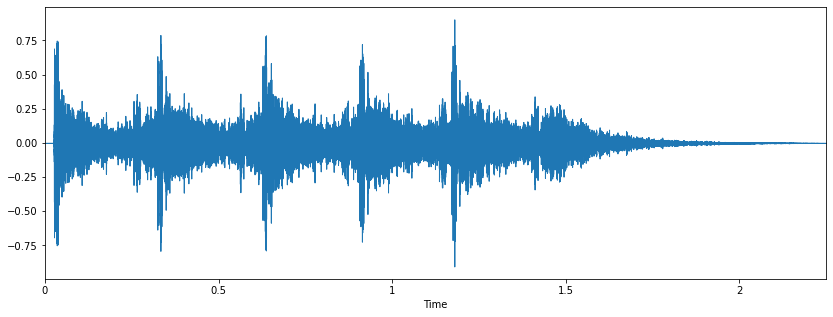

In [5]:
plt.figure(figsize = (14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr = sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

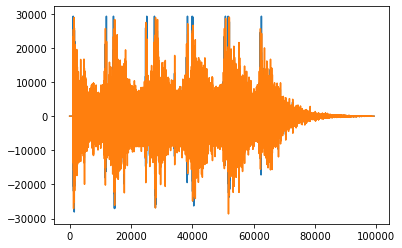

In [10]:
plt.plot(wave_audio)

In [11]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
       2.3116412e-05, 0.0000000e+00], dtype=float32)

In [12]:
import pandas as pd
audio_dataset_path = 'dataset1'
metadata = pd.read_csv('dataset1/UrbanSound8k.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
metadata['class'].value_counts()


children_playing    1000
drilling            1000
jackhammer          1000
dog_bark            1000
air_conditioner     1000
street_music        1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [14]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [15]:
#Extract Features

In [16]:
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [17]:
mfccs

array([[-9.3800201e+01,  7.4964676e+00,  1.5476104e+01, ...,
        -5.6935333e+02, -5.9172742e+02, -6.1055634e+02],
       [ 3.0774033e+01,  2.3719746e+01,  1.1416364e+01, ...,
         4.3051193e+01,  2.5888165e+01,  1.2927567e+01],
       [-3.2866507e+00, -1.2030355e+01, -1.5005075e+01, ...,
        -1.1103721e+01, -7.5504951e+00,  2.2212185e-01],
       ...,
       [ 6.4266539e-01, -3.2603269e+00, -4.7559185e+00, ...,
         2.4095769e+00,  3.1699095e+00, -1.5433559e-01],
       [-1.0001830e+01, -9.3599148e+00, -6.4467368e+00, ...,
        -5.0200760e-02,  7.2894061e-01, -8.3965683e-01],
       [ 1.9421942e+00,  2.0736120e+00,  3.0683601e+00, ...,
        -2.0609195e+00, -2.2312031e+00, -1.7239641e+00]], dtype=float32)

In [18]:
def features_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type = 'Kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate,n_mfcc =40)
    mfccs_scaled_features = np.mean(mfccs_features.T , axis = 0)
    
    return mfccs_scaled_features

In [19]:
import numpy as np
import os
from tqdm import tqdm
##iterate through every audio file and extract feaures
##using MEL-frequency cepstral coefficients

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:04, 19.28it/s]C:\Users\mohia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [07:00, 25.05it/s]C:\Users\mohia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\mohia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [07:19, 19.88it/s]


In [20]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68683, 110.56227, -54.14824, 62.01073, -...",children_playing
2,"[-459.56467, 122.80034, -47.92471, 53.265694, ...",children_playing
3,"[-414.55377, 102.896904, -36.664948, 54.18041,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [21]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [22]:
X.shape

(8732, 40)

In [23]:
## 
y = np.array(pd.get_dummies(y))

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =0)

In [25]:
X_train.shape

(6985, 40)

# Model Creation

In [4]:
!pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\mohia\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\mohia\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\mohia\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\mohia\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\mohia\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\mohia\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\mohia\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\mohia\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached re

In [1]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
num_labels = y.shape[1]

NameError: name 'y' is not defined

In [ ]:
Dense()

In [ ]:
model = Sequential()
#First Layer
model.add(Dense(100,input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
mode.add(Activation('Softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss= 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
#Training model
